##1. Loading the dataset, necessary data preprocessing, fitting the model and checking the assumptions of the model (20 marks)

In [71]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import LabelEncoder

In [72]:
df=pd.read_csv('autoo.csv')
#print first 5 values of dataset
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [73]:
#description of the data
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [74]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [75]:
import warnings
warnings.filterwarnings('ignore')

In [77]:
#to display the rows nd cols of dataset
df.shape

(398, 9)

###DATA PREPROCESSING

##Label encoding the string values

In [78]:
le=LabelEncoder()
df['car name']=le.fit_transform(df['car name'])
df['horsepower']=le.fit_transform(df['horsepower'])

##check the tranformed string value

In [79]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,15,3504,12.0,70,1,49
1,15.0,8,350.0,33,3693,11.5,70,1,36
2,18.0,8,318.0,27,3436,11.0,70,1,231
3,16.0,8,304.0,27,3433,12.0,70,1,14
4,17.0,8,302.0,22,3449,10.5,70,1,161


In [80]:
df.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0
car name,0


###no null values so no need to handle missing values

<Figure size 800x500 with 0 Axes>

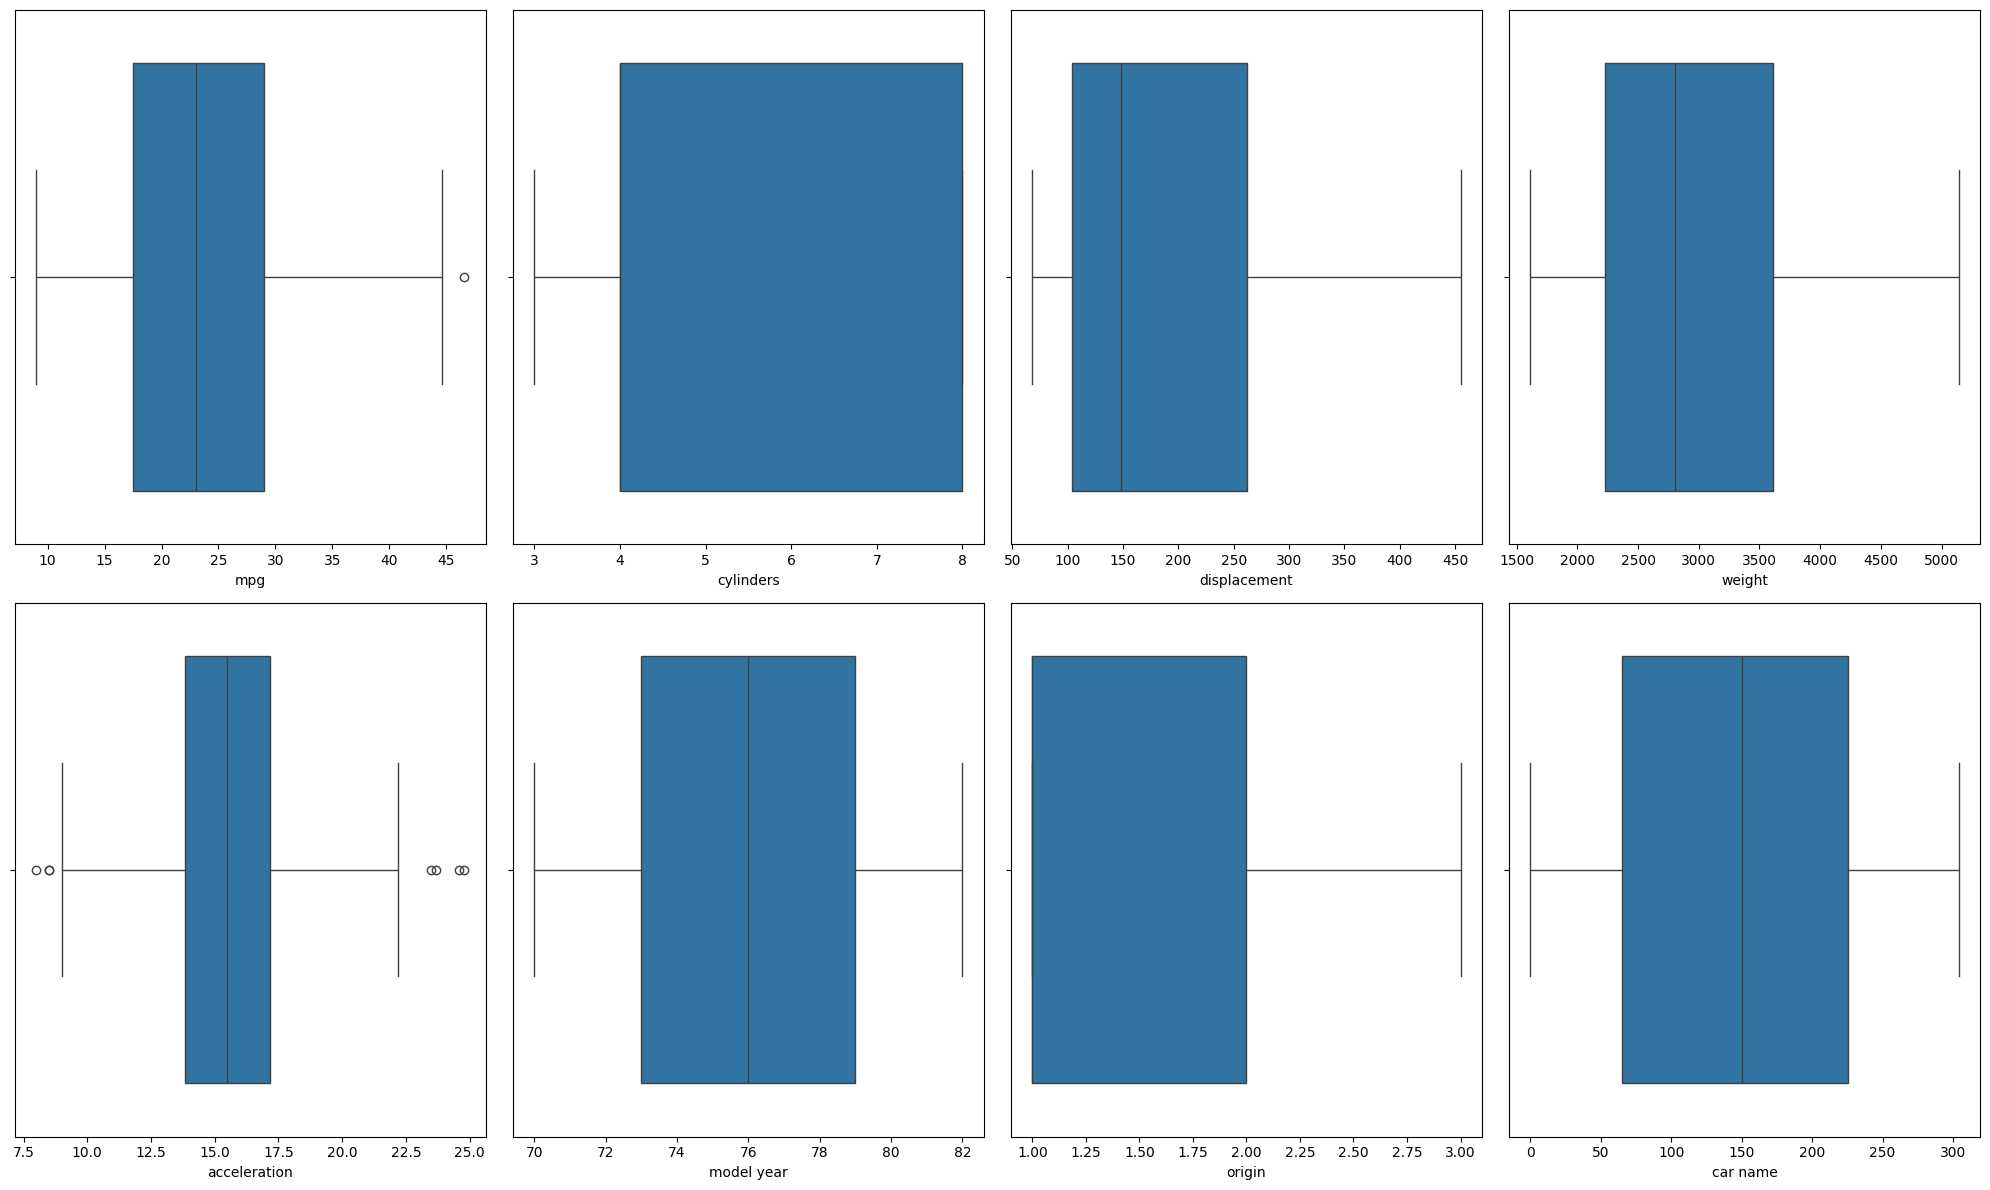

In [81]:
plt.figure(figsize=(8, 5))
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 12))
axes = axes.flatten()
import warnings
warnings.filterwarnings('ignore')
# Assuming 'model_year' is the correct column name in your dataframe
features = ['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'model year', 'origin','car name']

for idx, feature in enumerate(features):
    sns.boxplot(data=df, x=feature, ax=axes[idx])

plt.tight_layout()
plt.show()

###only acceleration and mpg has outliers we must handle outliers

In [82]:
#capping to remove outliers
import numpy as np
for col in ['mpg','acceleration']:
  q1, q3 = np.percentile(df[col], [25, 75])
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
  df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

###after capping check whether outliers exist

<Figure size 800x500 with 0 Axes>

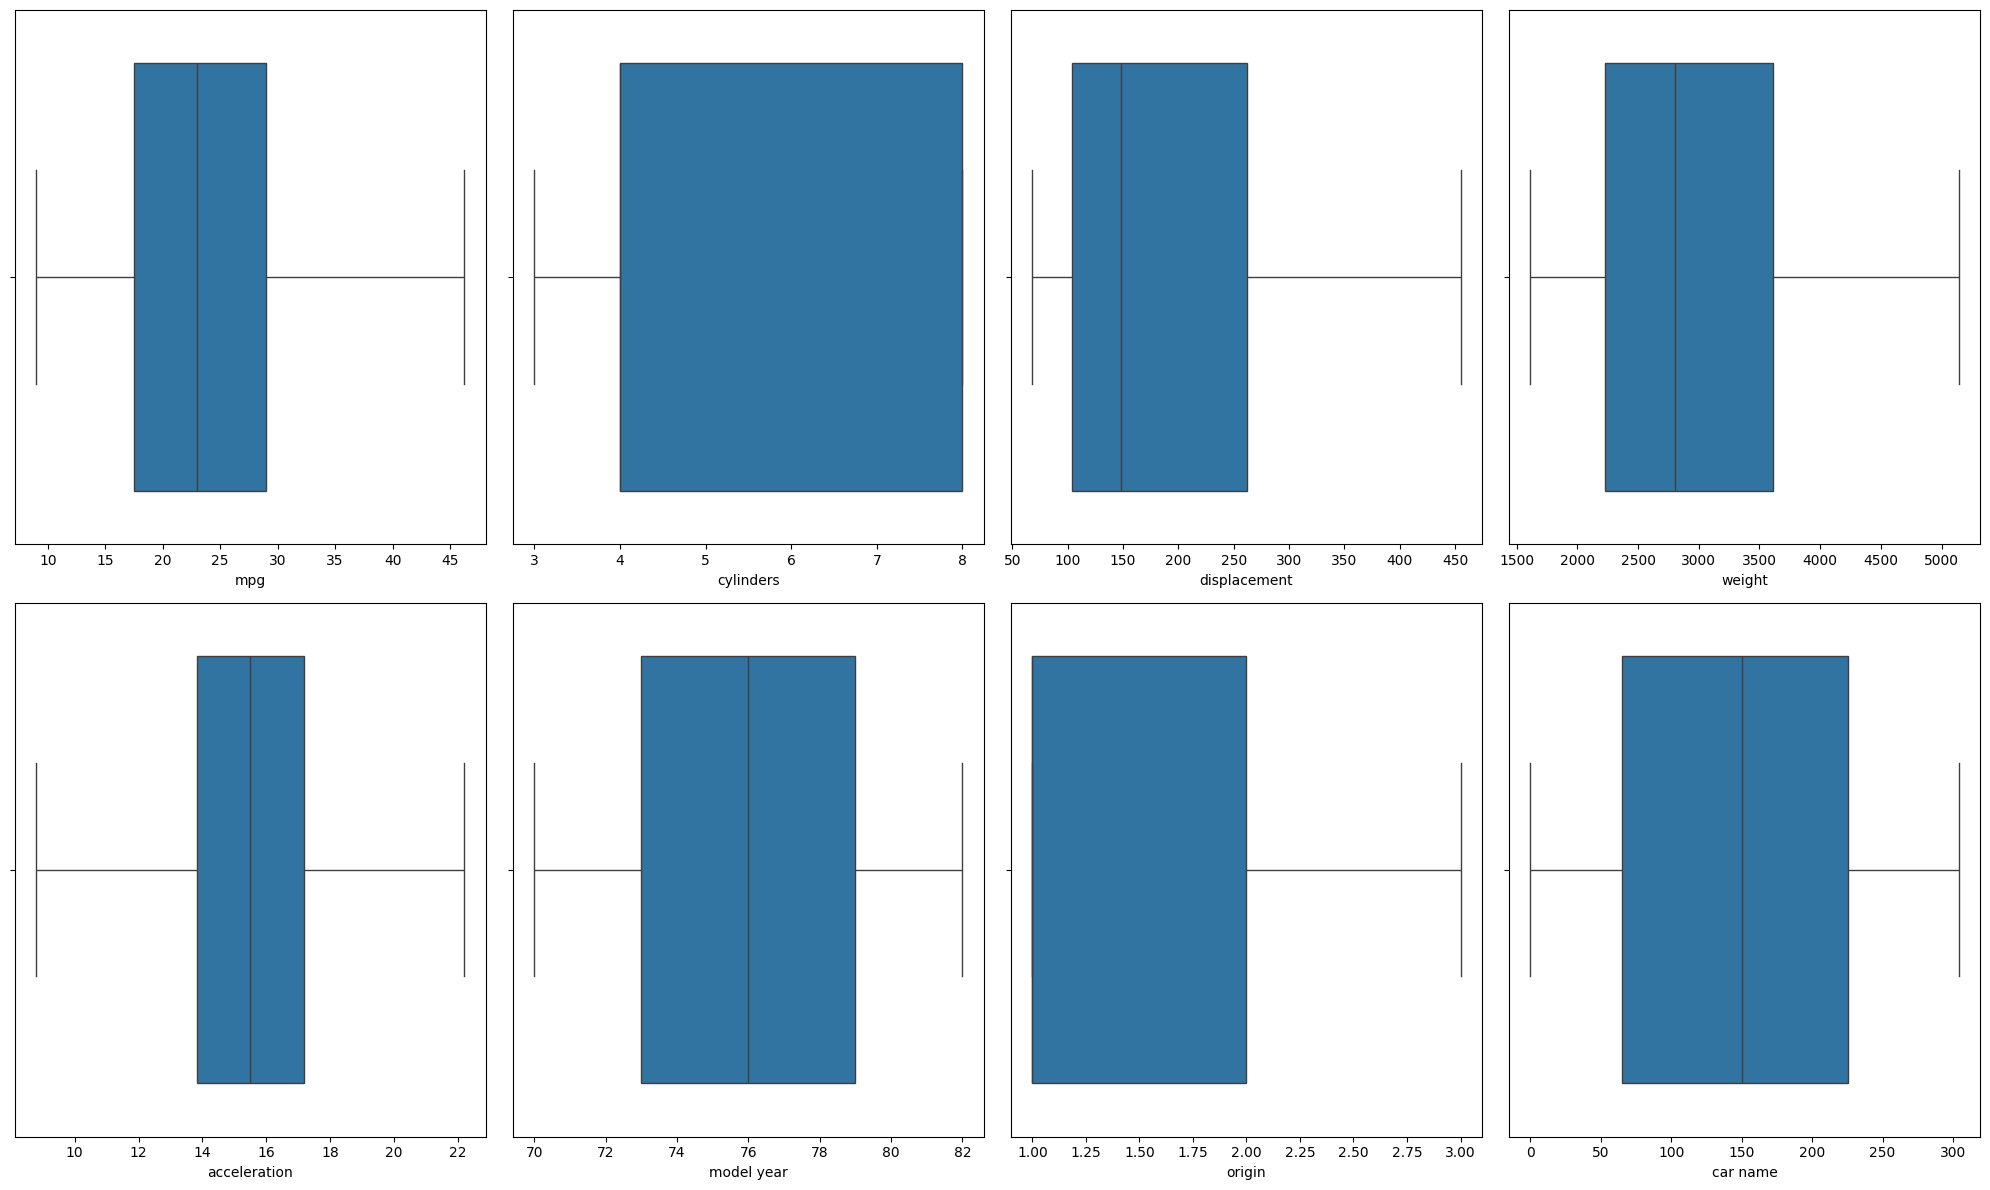

In [83]:
plt.figure(figsize=(8, 5))
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 12))
axes = axes.flatten()
import warnings
warnings.filterwarnings('ignore')
# Assuming 'model_year' is the correct column name in your dataframe
features = ['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'model year', 'origin','car name']

for idx, feature in enumerate(features):
    sns.boxplot(data=df, x=feature, ax=axes[idx])

plt.tight_layout()
plt.show()

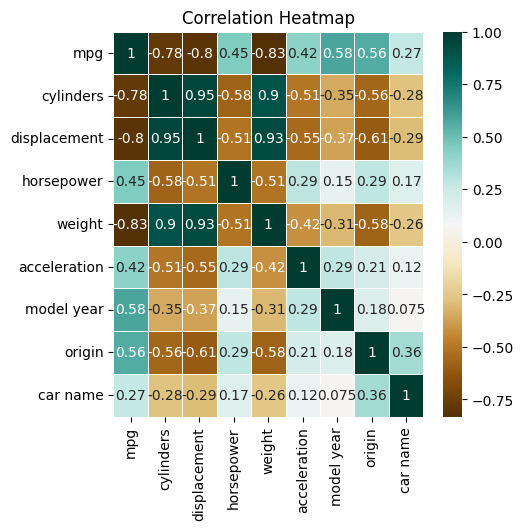

In [84]:
correlation_matrix = df.corr()
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True,cmap='BrBG',linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

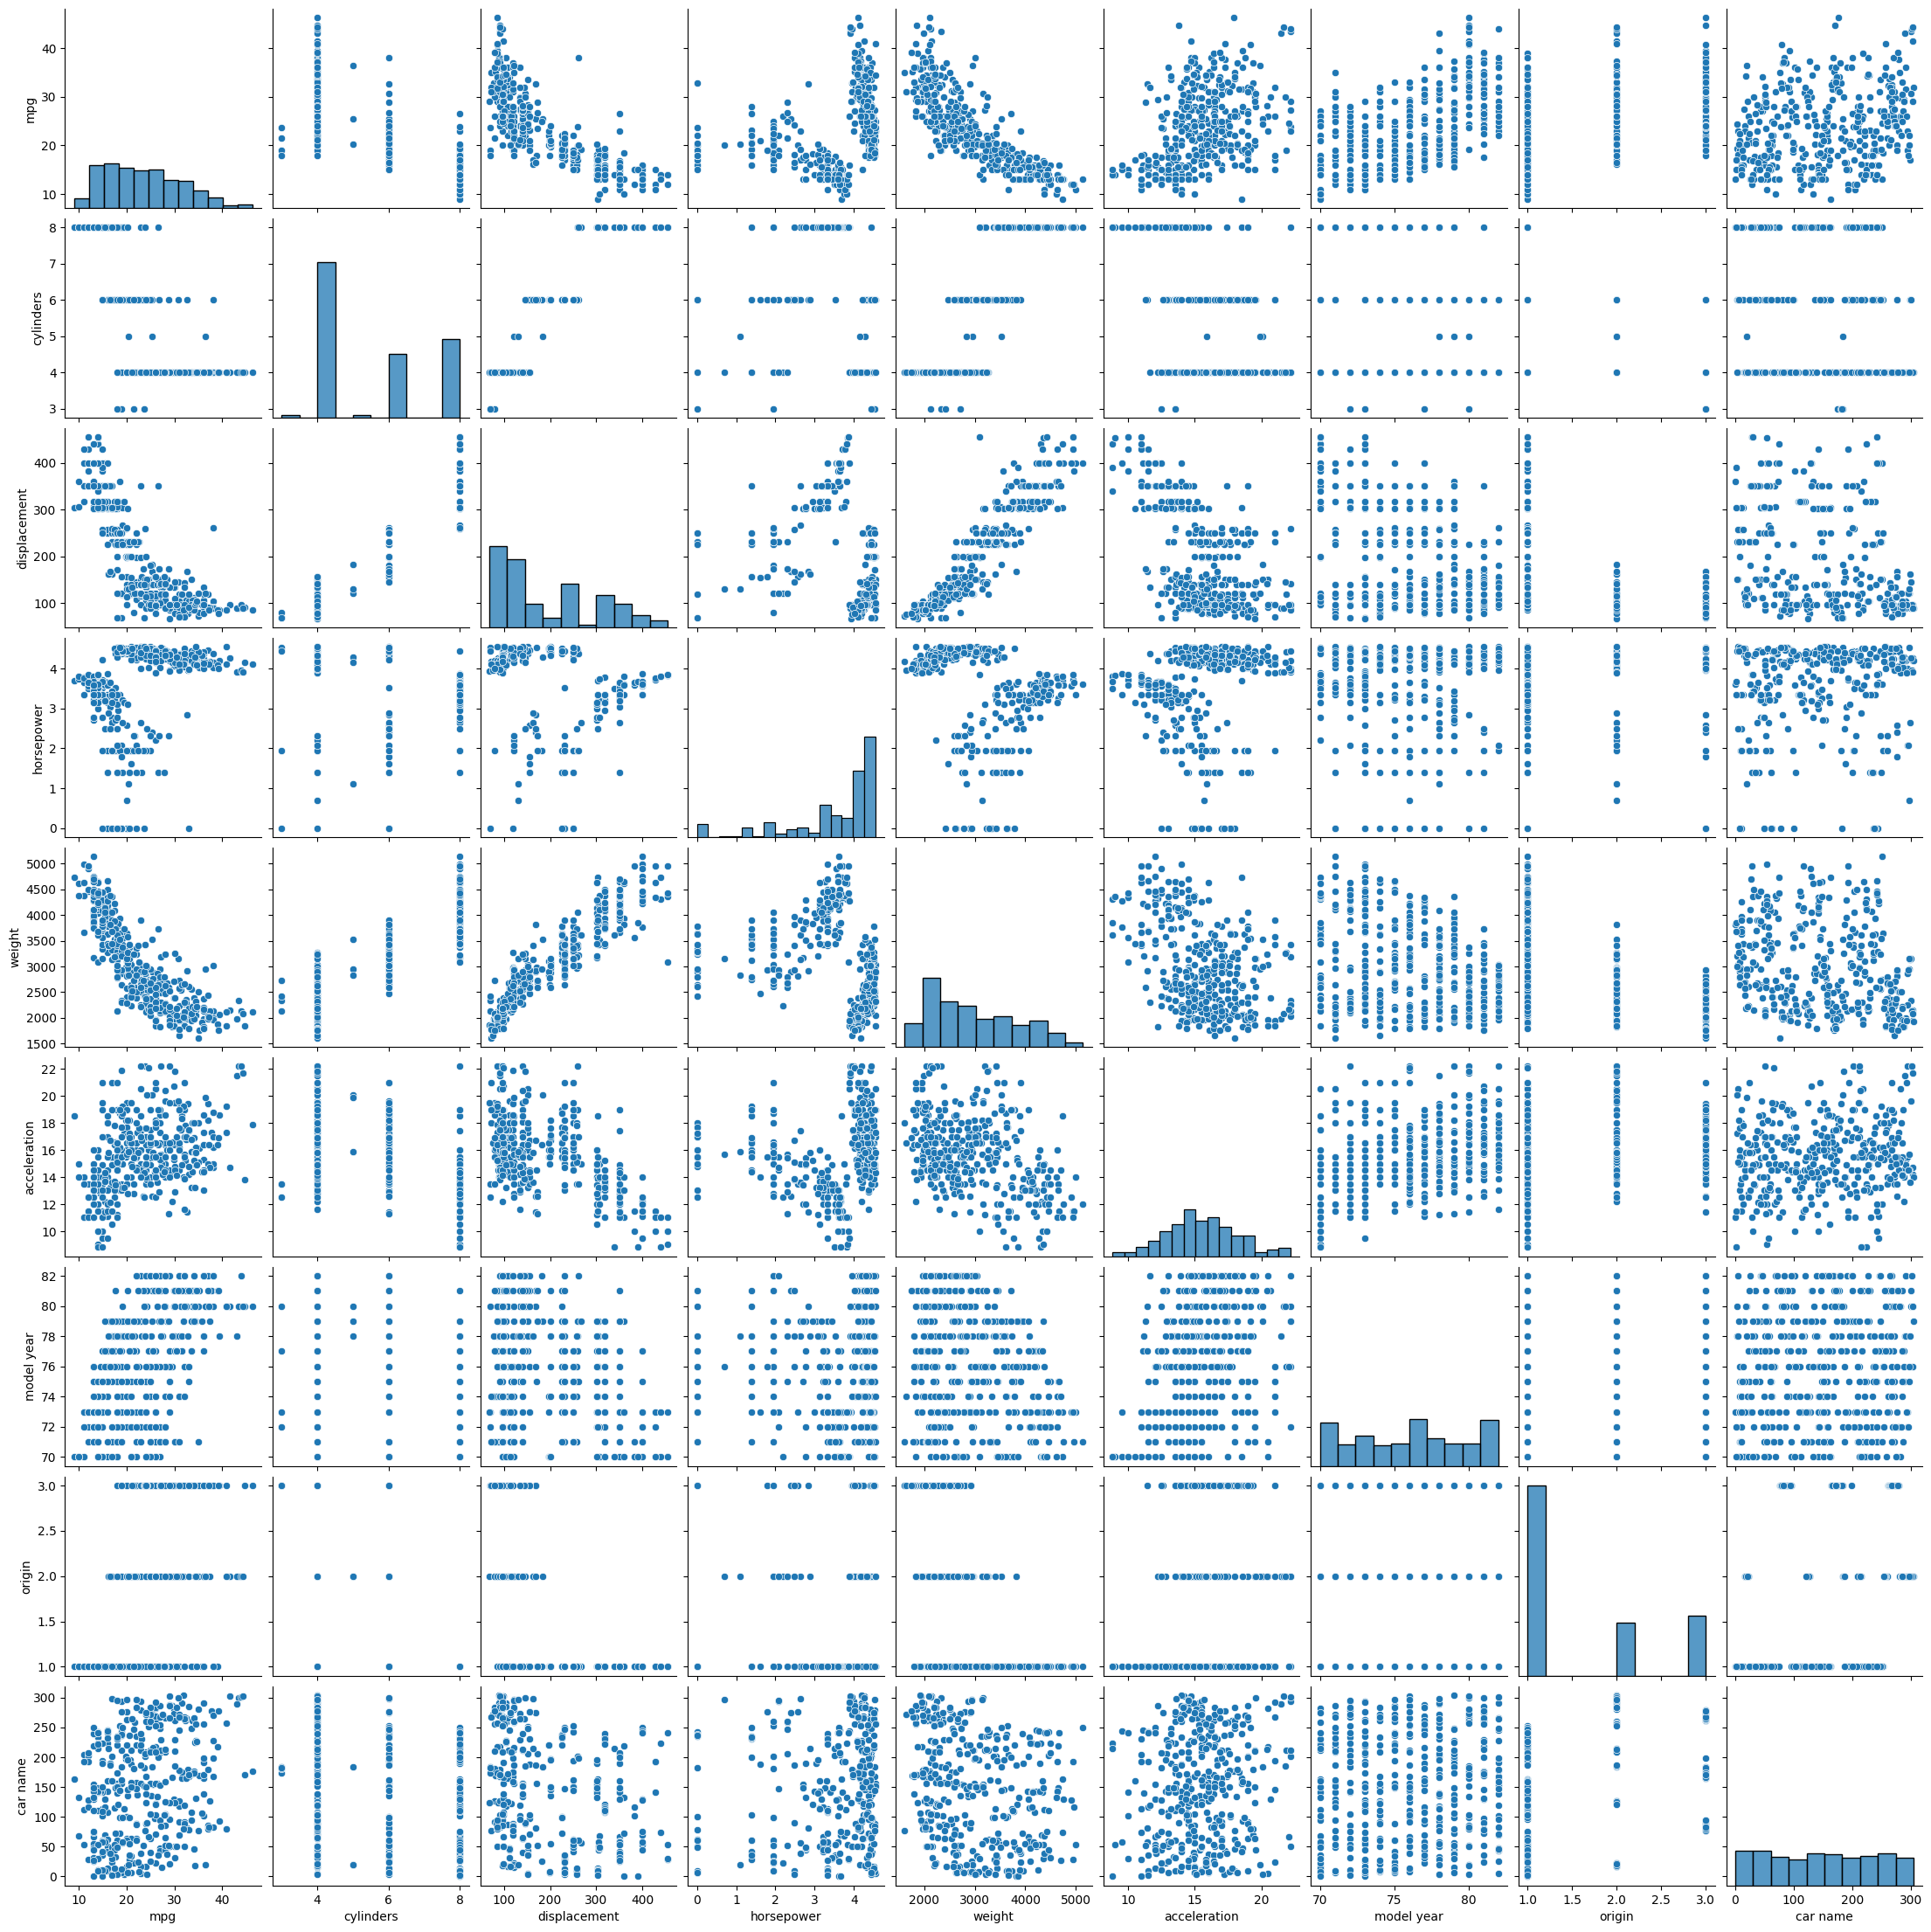

In [68]:
sns.pairplot(df)
plt.show()

array([[<Axes: title={'center': 'mpg'}>,
        <Axes: title={'center': 'cylinders'}>,
        <Axes: title={'center': 'displacement'}>],
       [<Axes: title={'center': 'horsepower'}>,
        <Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'acceleration'}>],
       [<Axes: title={'center': 'model year'}>,
        <Axes: title={'center': 'origin'}>,
        <Axes: title={'center': 'car name'}>]], dtype=object)

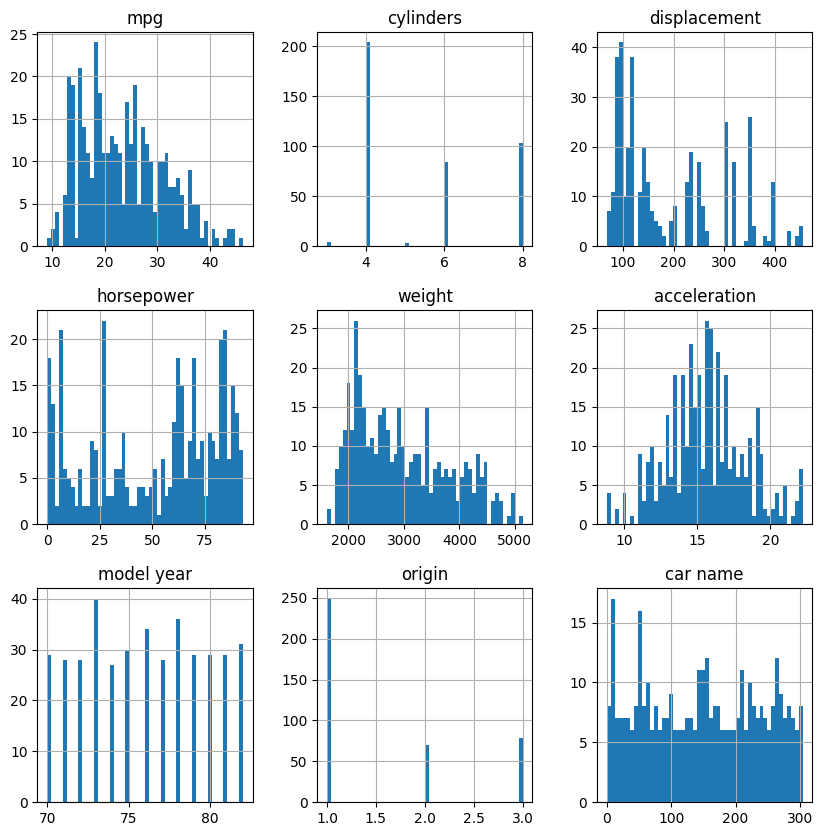

In [52]:
 df.hist(bins=50,figsize=(10,10))

In [85]:
skewness = df.skew()
print("Skewness for each feature:\n", skewness)

Skewness for each feature:
 mpg             0.454934
cylinders       0.526922
displacement    0.719645
horsepower     -0.316618
weight          0.531063
acceleration    0.163862
model year      0.011535
origin          0.923776
car name        0.018665
dtype: float64


from the above we could see that the horse power is negative and left skewed and there is no value greater than 1 so no right skew

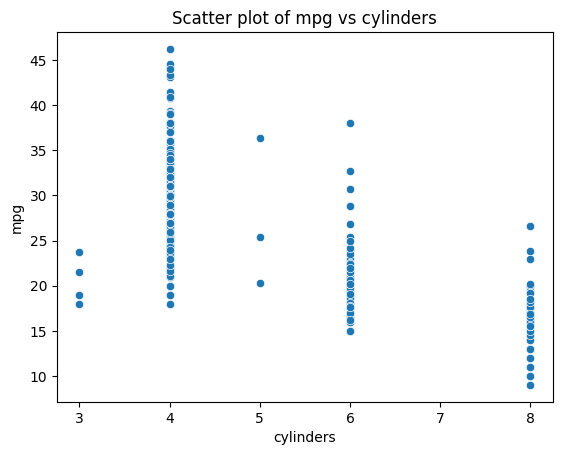

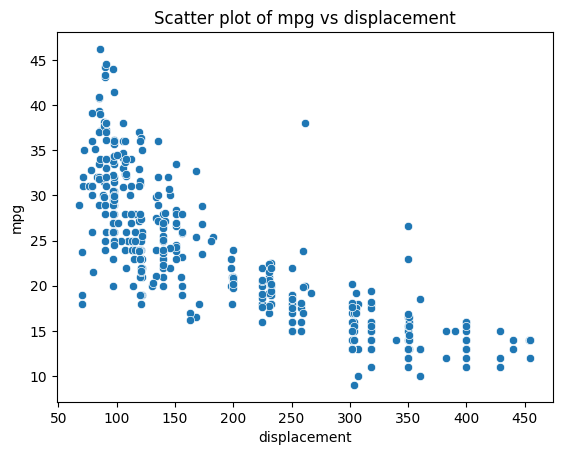

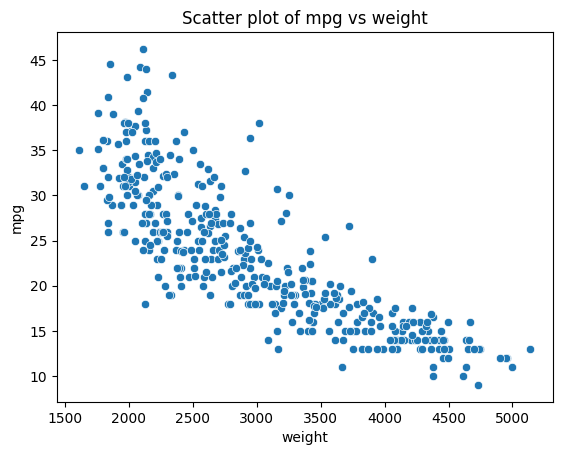

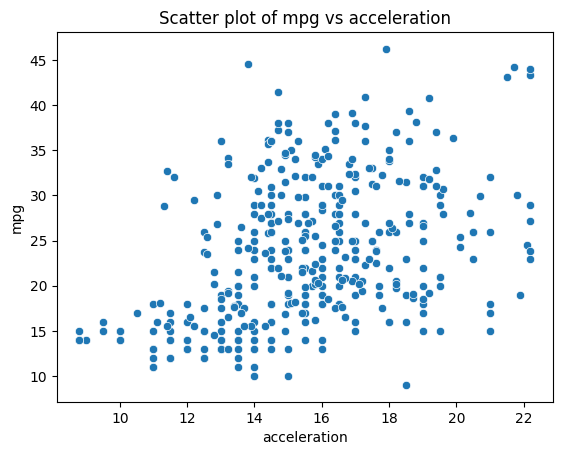

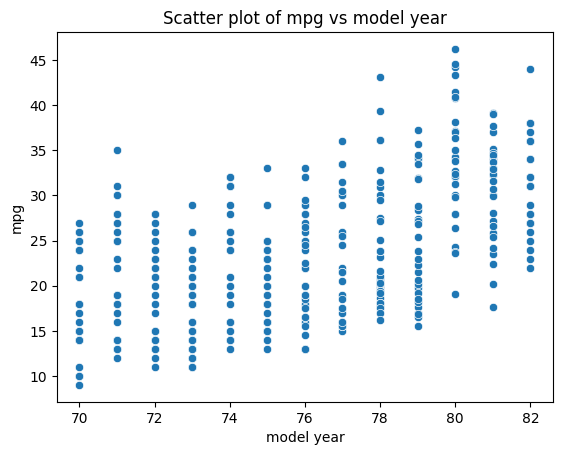

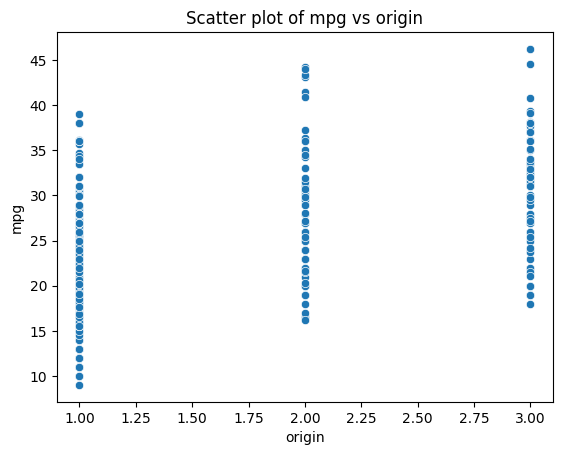

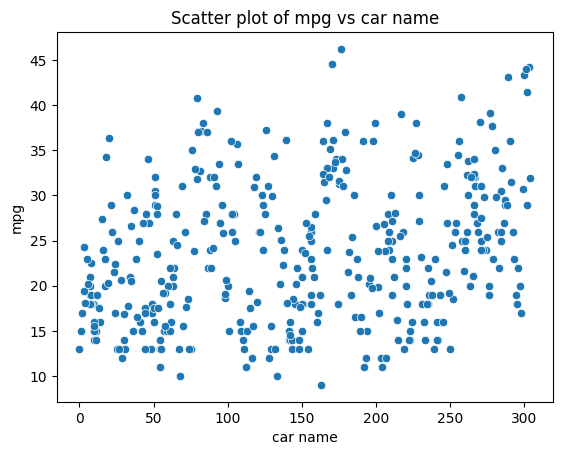

In [86]:
features = ['cylinders', 'displacement', 'weight', 'acceleration', 'model year', 'origin','car name']
for feature in features:
  sns.scatterplot(x=df[feature], y=df['mpg'])
  plt.title(f"Scatter plot of mpg vs {feature}")
  plt.show()

###**MODEL BUILDING**

In [89]:
from sklearn.utils import shuffle
df= shuffle(df, random_state=100)
X = df.drop(columns=['mpg'])
y = df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()
print("Regression Model Summary:")
print(model.summary())

Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     183.7
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          1.28e-112
Time:                        06:29:02   Log-Likelihood:                -830.04
No. Observations:                 318   AIC:                             1678.
Df Residuals:                     309   BIC:                             1712.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -20.905

In [91]:
X_test_sm = sm.add_constant(X_test)
y_pred = model.predict(X_test_sm)

In [92]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"\nEvaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared: {r2:.2f}")


Evaluation Metrics:
Mean Absolute Error (MAE): 2.58
Mean Squared Error (MSE): 10.65
Root Mean Squared Error (RMSE): 3.26
R-squared: 0.80


###from the above rmse and r2 value which is
###r2=0.80 (which is near to means model is fit for prediction)
###rmse=3.26(which means model has low error)

In [94]:
residuals = y_train - model.predict(X_train_sm)

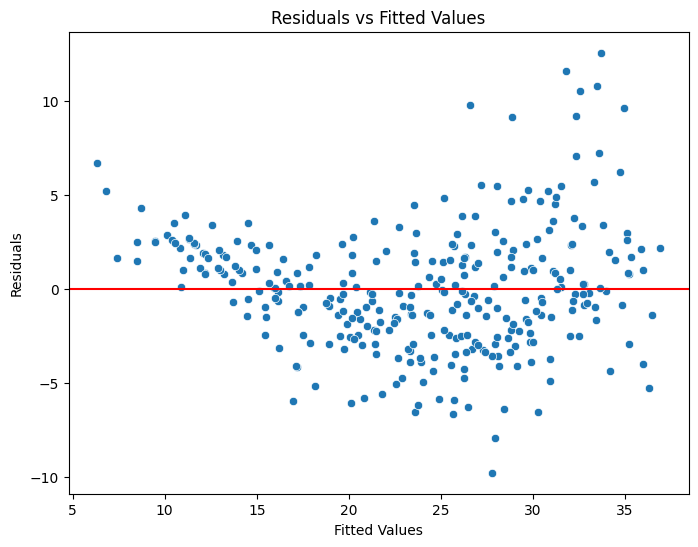

In [100]:
# Residual Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=model.predict(X_train_sm), y=residuals)
plt.axhline(0, color='r', linestyle='-')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

##given graph is checked and I conclude that it's *homoscedasticity*

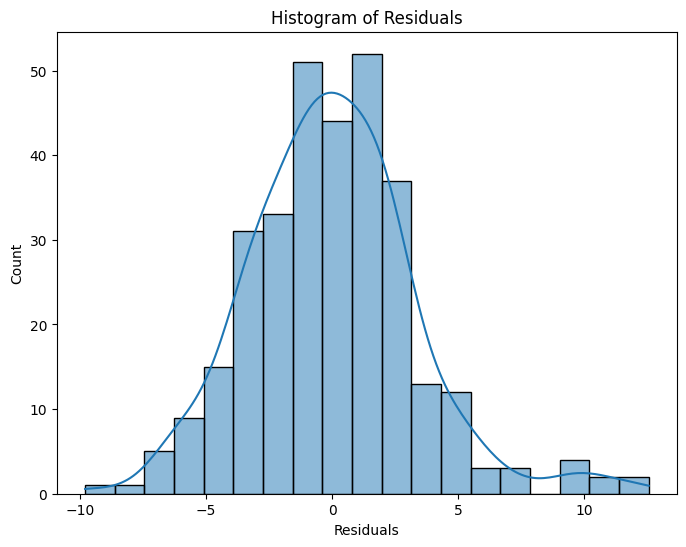

In [96]:
# Histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.show()

##follows normal distribution

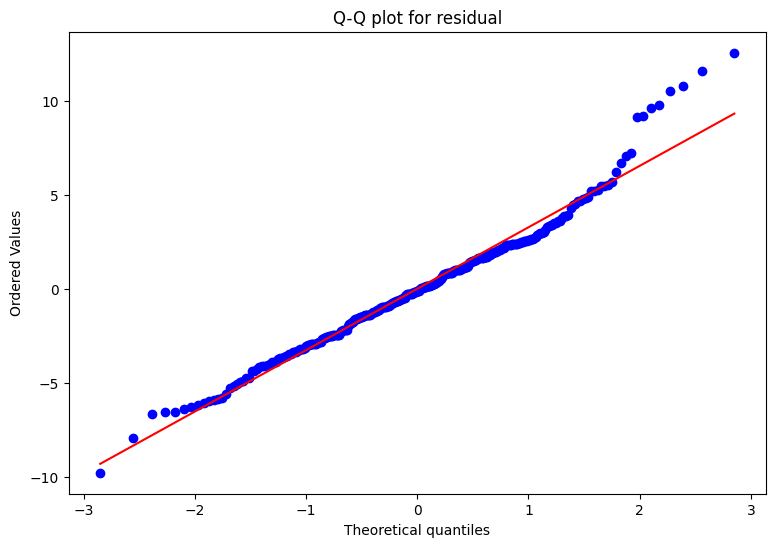

In [99]:
#q-q plot
import statsmodels.api as sm
from scipy.stats import probplot
plt.figure(figsize=(9, 6))
probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q plot for residual')
plt.show()

from the above chart I could conclude that my model does follows that trend and it's good for prediction

  ## 2.Multicollinearity finding and feature reduction (10 marks)

###MULTICOLLINEARITY

In [103]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df.drop(columns=['mpg'])
X = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


        Feature         VIF
0         const  656.420086
1     cylinders   11.844142
2  displacement   20.795585
3    horsepower    1.551083
4        weight    8.680899
5  acceleration    1.644814
6    model year    1.187617
7        origin    1.763740
8      car name    1.168787


### the features cylinder,displacemnt,weight has high VIF value which means these features are highly correlated with each other. so we must handle them

## FEATURE REDUCTION

In [105]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

X = df.drop(columns=['mpg'])
y = df['mpg']
model = LinearRegression()
rfe = RFE(model, n_features_to_select=5)
X_selected = rfe.fit_transform(X, y)
print("Selected Features:", X.columns[rfe.support_])

Selected Features: Index(['cylinders', 'displacement', 'acceleration', 'model year', 'origin'], dtype='object')


###do a model with selected 5 features

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

s_f=['cylinders', 'displacement', 'acceleration', 'model year', 'origin']
X = df[s_f]
y = df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

print("\nModel Coefficients:")
print("Intercept:", model.intercept_)

Root Mean Squared Error (RMSE): 3.7636629408912166
R² Score: 0.7344332018963409

Model Coefficients:
Intercept: -19.732007741486576


In [107]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

X = df.drop(columns=['mpg'])
y = df['mpg']
model = LinearRegression()
rfe = RFE(model, n_features_to_select=6)
X_selected = rfe.fit_transform(X, y)
print("Selected Features:", X.columns[rfe.support_])

Selected Features: Index(['cylinders', 'displacement', 'horsepower', 'acceleration', 'model year',
       'origin'],
      dtype='object')


###do a model with selected 6 features

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

s_f=['cylinders', 'displacement', 'horsepower', 'acceleration', 'model year','origin']
X = df[s_f]
y = df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

print("\nModel Coefficients:")
print("Intercept:", model.intercept_)

Root Mean Squared Error (RMSE): 3.7160970576276555
R² Score: 0.7411033512816902

Model Coefficients:
Intercept: -22.488805945418186


In [109]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

X = df.drop(columns=['mpg'])
y = df['mpg']
model = LinearRegression()
rfe = RFE(model, n_features_to_select=7)
X_selected = rfe.fit_transform(X, y)
print("Selected Features:", X.columns[rfe.support_])

Selected Features: Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model year', 'origin'],
      dtype='object')


In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

s_f=['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration','model year', 'origin']
X = df[s_f]
y = df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

print("\nModel Coefficients:")
print("Intercept:", model.intercept_)

Root Mean Squared Error (RMSE): 3.3034162431841136
R² Score: 0.7954125771235676

Model Coefficients:
Intercept: -20.790084637363677


for n=5 feature r2=0.734
for n=6 features r2=0.741
for n=7 features r2=0.79
so i finally conclude that without feature subset selection itself the model was good fit :)

##3.Cross validation and performance checking (10 marks)

In [101]:
from sklearn.model_selection import KFold,cross_val_score

**n=5 splits**

In [112]:
kf=KFold(n_splits=5,shuffle=True,random_state=42)
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
cv_score=cross_val_score(lr_model, X, y, cv=kf, scoring='neg_mean_squared_error')
cv_rmse=np.sqrt(-cv_score)
print(cv_score,cv_rmse.mean())

[-10.91255888  -9.06215804 -12.64975322 -13.90047525 -10.31882322] 3.362206775383934


**n=15 splits**

In [116]:
kf=KFold(n_splits=15,shuffle=True,random_state=42)
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
cv_score=cross_val_score(lr_model, X, y, cv=kf, scoring='neg_mean_squared_error')
cv_rmse=np.sqrt(-cv_score)
print(cv_score,cv_rmse.mean())

[ -8.2586231  -12.10059984 -14.627857    -9.16672619  -4.60599136
 -11.3540862   -8.7409214  -15.11924962 -14.17951805  -9.12402294
 -16.25409268 -15.8659678  -12.15863606 -11.79846233  -7.28628897] 3.3324938012428627


**n=16 splits**

In [121]:
kf=KFold(n_splits=16,shuffle=True,random_state=42)
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
cv_score=cross_val_score(lr_model, X, y, cv=kf, scoring='neg_mean_squared_error')
cv_rmse=np.sqrt(-cv_score)
print(cv_score,cv_rmse.mean())

[ -8.90860773  -9.62368013 -15.1873463  -12.46886054  -2.9934703
  -9.08108223 -12.04413816  -5.56787465 -21.90673008 -11.26001274
 -10.19327251 -14.02131913 -15.25057378 -11.82260695 -13.67152093
  -7.02115829] 3.2970629626051755


**n=17 splits**

In [122]:
kf=KFold(n_splits=17,shuffle=True,random_state=42)
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
cv_score=cross_val_score(lr_model, X, y, cv=kf, scoring='neg_mean_squared_error')
cv_rmse=np.sqrt(-cv_score)
print(cv_score,cv_rmse.mean())

[ -9.09837646  -9.59477825 -13.98259329 -14.24693632  -4.42903301
  -6.71756267 -10.9008393   -8.86168507 -16.68598843 -12.35153785
 -10.87028864 -17.94179636 -14.73620072 -13.12976298 -10.64381875
 -12.2096168   -7.16193726] 3.331168957622345


## across various cross validation  conclude that the model with n=16 splits has the best rmse score which is relatively lower compared to othes

## 4. Regularization and fitting the model (marks)

Ridge regression

In [124]:
from sklearn.linear_model import Ridge, Lasso
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
r2_ridge = r2_score(y_test, y_pred_ridge)
print("Ridge R2 :", r2_ridge)

Ridge RMSE: 3.302709287355606
Ridge R² : 0.7955001342365602



Lasso regression

In [125]:
# Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print("Lasso RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
r2_lasso = r2_score(y_test, y_pred_lasso)
print("Lasso R2 :", r2_lasso)

Lasso RMSE: 3.299726524575518
Lasso R² : 0.7958693457493611


### there is no significant differnce between the R2 value of model built using ridge and lasso but the rmse value of lasso is relatively lower than ridge

#K-fold with ridge

In [126]:
ridge = Ridge()
param_grid = {"alpha": np.logspace(-3, 3, 10)}
ridge_cv = GridSearchCV(ridge, param_grid, cv=16, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)
y_pred_ridge = ridge_cv.best_estimator_.predict(X_test)
print("Best Ridge alpha:", ridge_cv.best_params_['alpha'])
print("Ridge Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("Ridge Regression r2:",r2_score(y_test, y_pred_ridge) )

Best Ridge alpha: 10.0
Ridge Regression RMSE: 3.2976619507106815
Ridge Regression r2: 0.7961247068930244


## K-Fold with lasso


In [127]:
lasso = Lasso()
param_grid = {"alpha": np.logspace(-3, 3, 10)}
lasso_cv = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train, y_train)
y_pred_lasso = lasso_cv.best_estimator_.predict(X_test)
print("Best Lasso alpha:", lasso_cv.best_params_['alpha'])
print("Lasso Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("lasso Regression r2:",r2_score(y_test, y_pred_lasso) )

Best Lasso alpha: 0.001
Lasso Regression RMSE: 3.3030359513447065
lasso Regression r2: 0.7954596789377328


##After regularization almost everything is same so we need not to regularize the above dataset